# P3.4 - prezentacja rozwiązania
---
Aleksander Czeszejko-Sochacki  
Sławomir Górawski

In [1]:
using Images
using TestImages
using PyPlot

include("program.jl");

---
## Testy

In [2]:
function show_grayscale_image(img::Matrix, name::String)
    imshow(img, cmap="gray")
    title(ucfirst(name))
    axis("off")
end;

In [3]:
function test_and_plot_results(
        img::Matrix, new_x::Int, new_y::Int, first_direction::DIRECTION=vertical)
    # Casting image to raw matrix of floats
    raw_img = Float64.(img)
    # Plot setup
    figure(figsize=(10, 10))
    images = [raw_img]
    times = []
        
    # Image transformations
    for method in [nearest_neighbours, linear_spline, cubic_spline]
        time = @elapsed resized_img = resize(
            raw_img, new_x, new_y, method, first_direction)
        push!(images, resized_img)
        push!(times, time)
    end
        
    # Plotting results
    padded_images = paddedviews(1, images...)
    for (i, (img, name)) in enumerate(zip(padded_images, ["original image",
                    "nearest neighbours", "linear spline", "cubic spline"]))
        subplot(2, 2, i)
        show_grayscale_image(Float64.(img), name)
    end
    tight_layout()
    
    # Priting elapsed times
    @printf "ELAPSED TIMES:\n"
    for (time, name) in zip(times, ["nearest neighbours", "linear spline", "cubic spline"])
        @printf "%-18s - %fs\n" name time
    end
end;

In [4]:
function compare_directions(img::Matrix, new_x::Int, new_y::Int)
    raw_img = Float64.(img)
    figure(figsize=(10, 5))
    for (i, (method, name)) in enumerate(zip([linear_spline, cubic_spline],
                ["Linear spline", "Cubic spline"]))
        vfirst = resize(raw_img, new_x, new_y, method, vertical)
        hfirst = resize(raw_img, new_x, new_y, method, horizontal)
        diff_img = 1.0 - abs.(vfirst - hfirst)
        subplot(1, 2, i)
        show_grayscale_image(diff_img, name)
    end
    tight_layout()
end;

---
## Przykłady

### 1. Powiększanie obrazu
Wizualne porównanie algorytmów + czas działania:

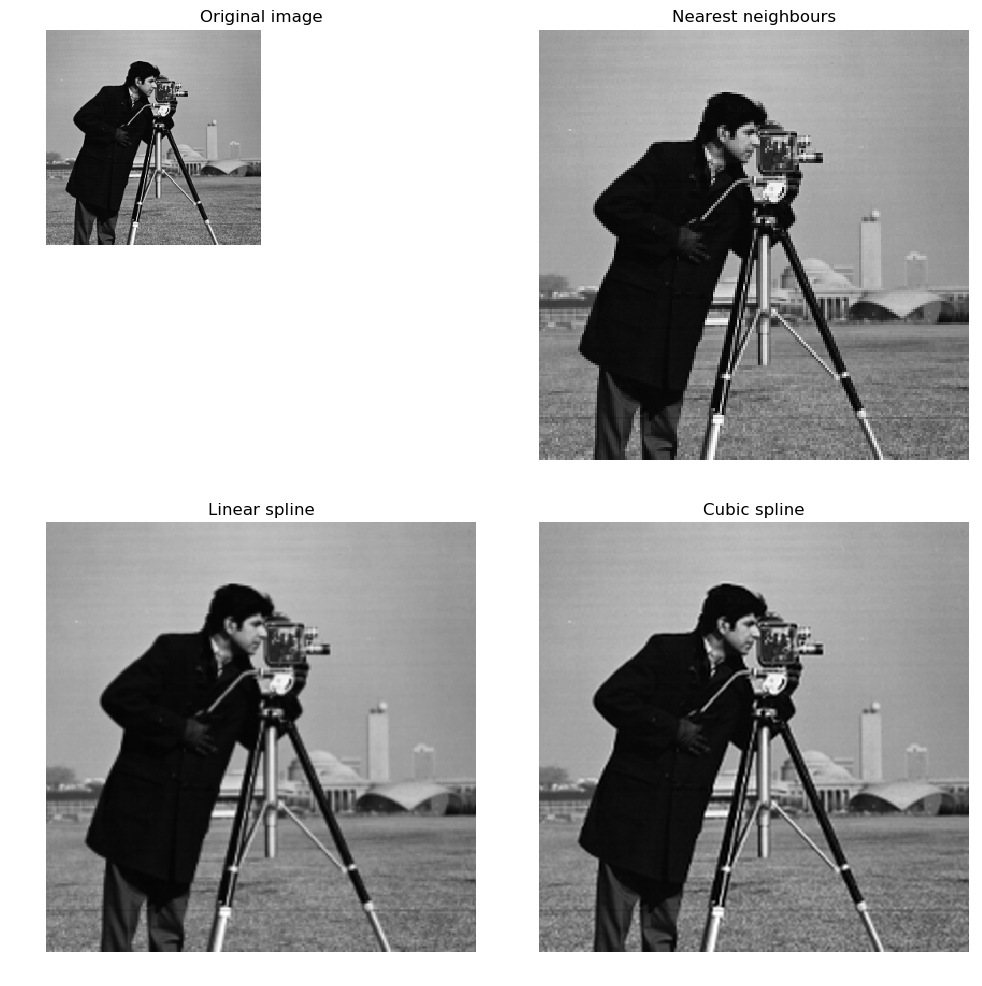

ELAPSED TIMES:
nearest neighbours - 0.030154s
linear spline      - 0.011554s
cubic spline       - 0.792738s


In [6]:
img1 = testimage("cameraman")
img1 = imresize(img1, (200, 200)) # original resolution was 512x512
test_and_plot_results(img1, 400, 400)

Sprawdzenie, czy kolejność skalowania ma znaczenie poprzez wygenerowanie obrazu różnicy:

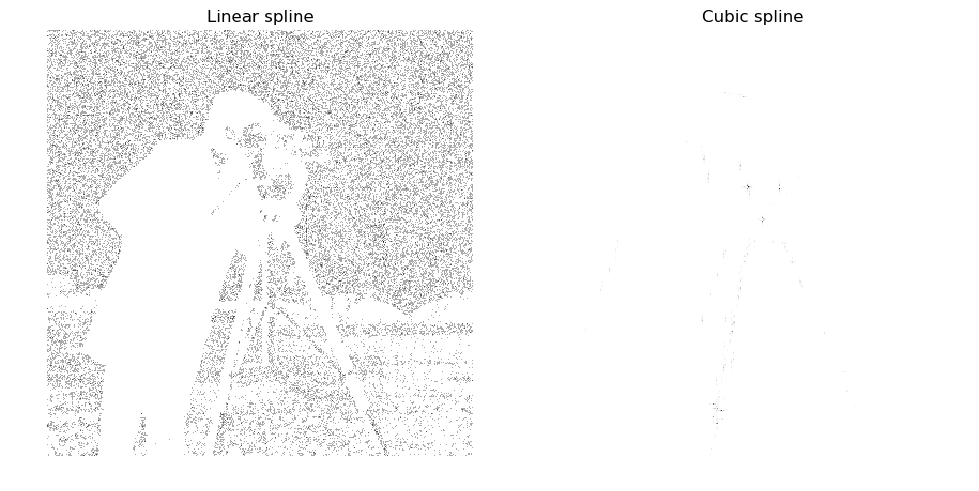

In [7]:
compare_directions(img1, 400, 400)

### 2. Zmniejszanie obrazu

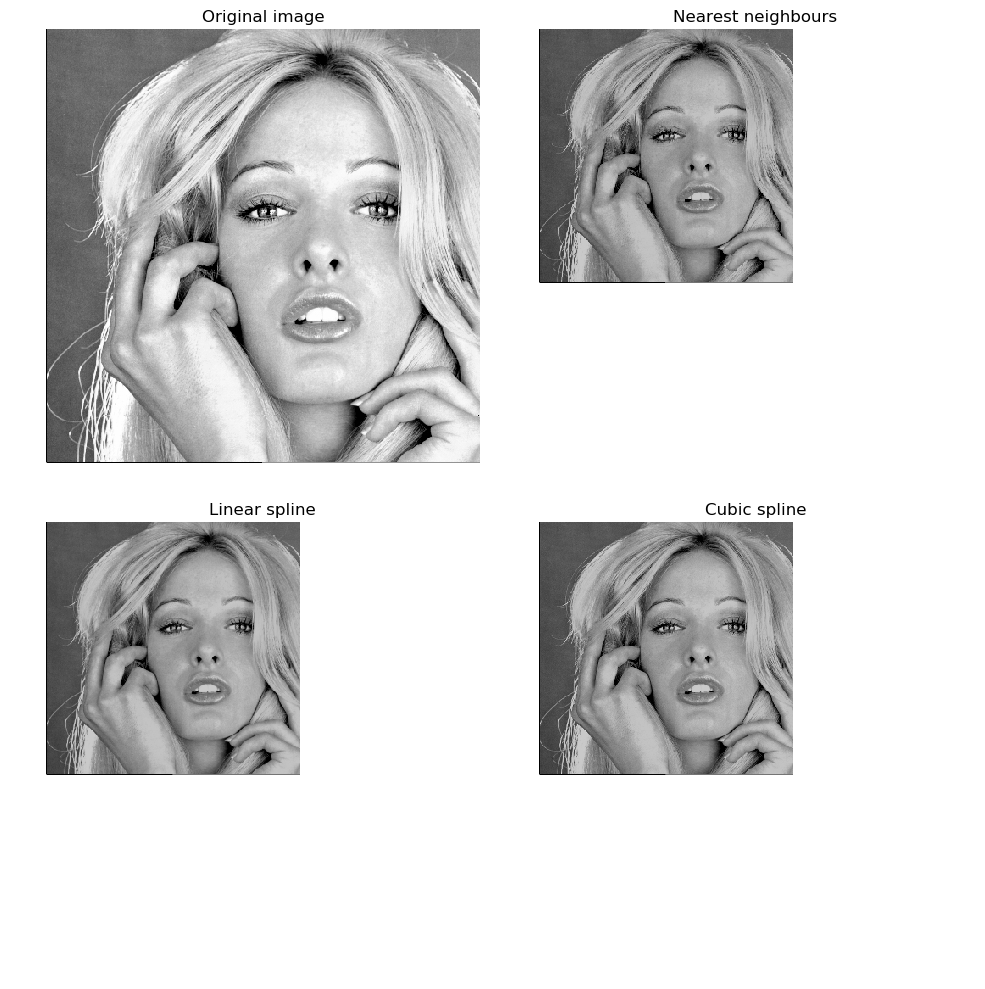

ELAPSED TIMES:
nearest neighbours - 0.019970s
linear spline      - 0.010779s
cubic spline       - 1.642014s


In [8]:
img2 = testimage("woman_blonde")
test_and_plot_results(img2, 300, 300)

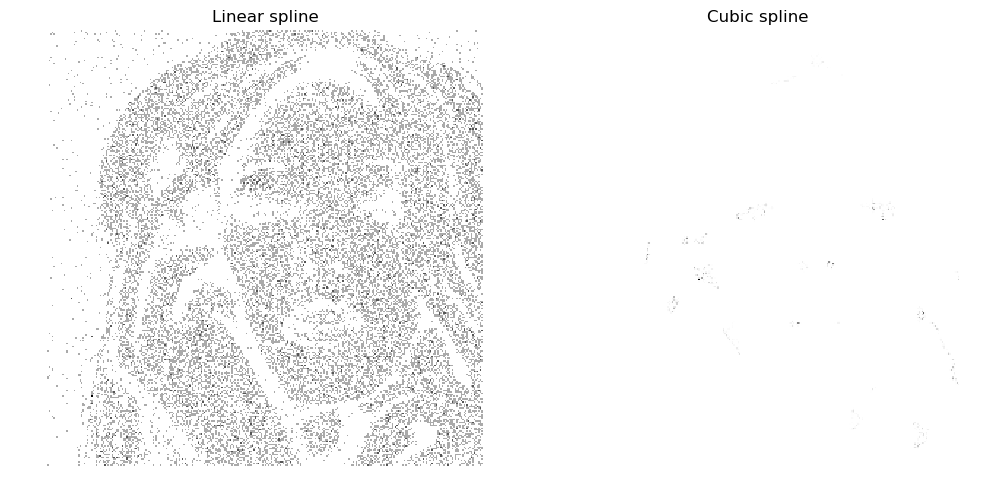

In [9]:
compare_directions(img2, 300, 300)

### 3. Deformacja

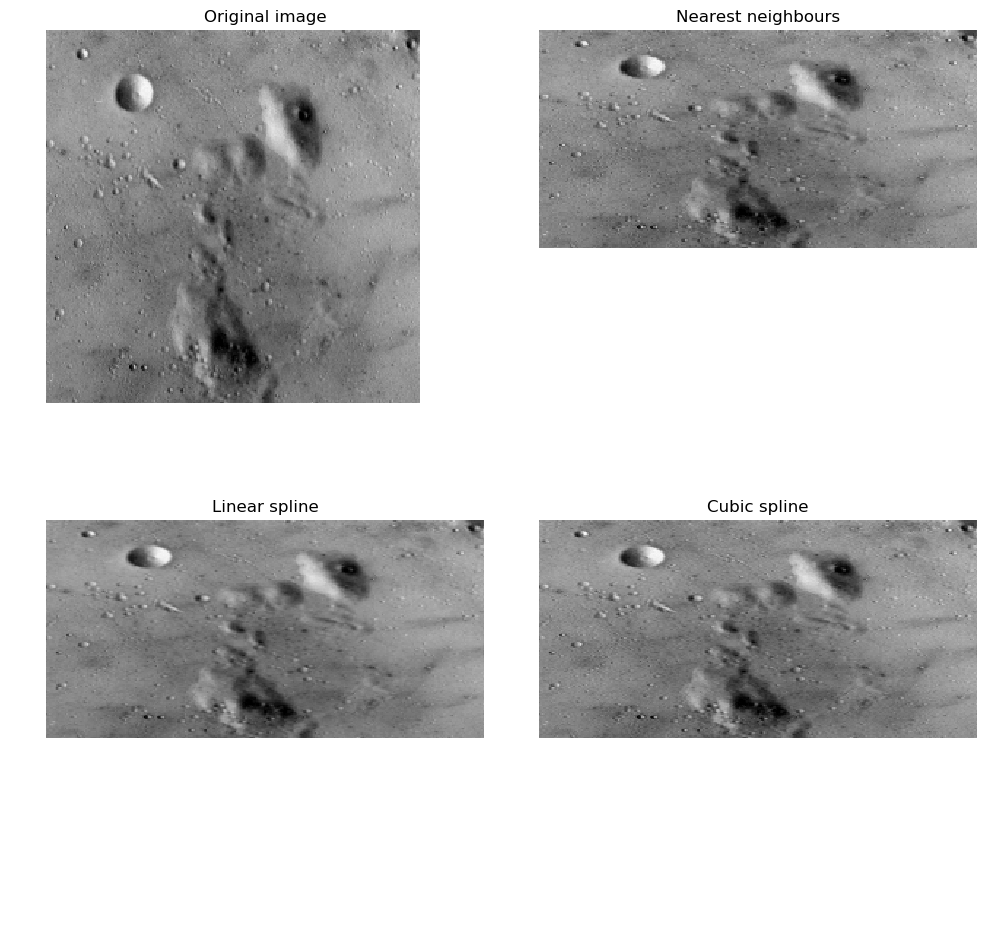

ELAPSED TIMES:
nearest neighbours - 0.011819s
linear spline      - 0.008206s
cubic spline       - 0.590233s


In [10]:
img3 = testimage("moonsurface")
test_and_plot_results(img3, 300, 150, horizontal)

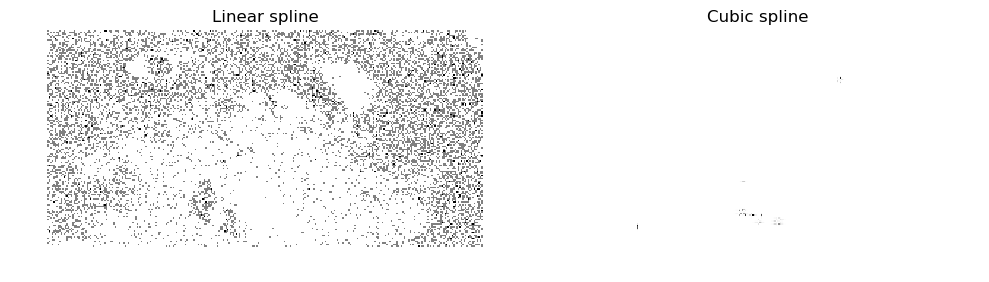

In [11]:
compare_directions(img3, 300, 150)

### 4. Mocno kontrastowy obraz

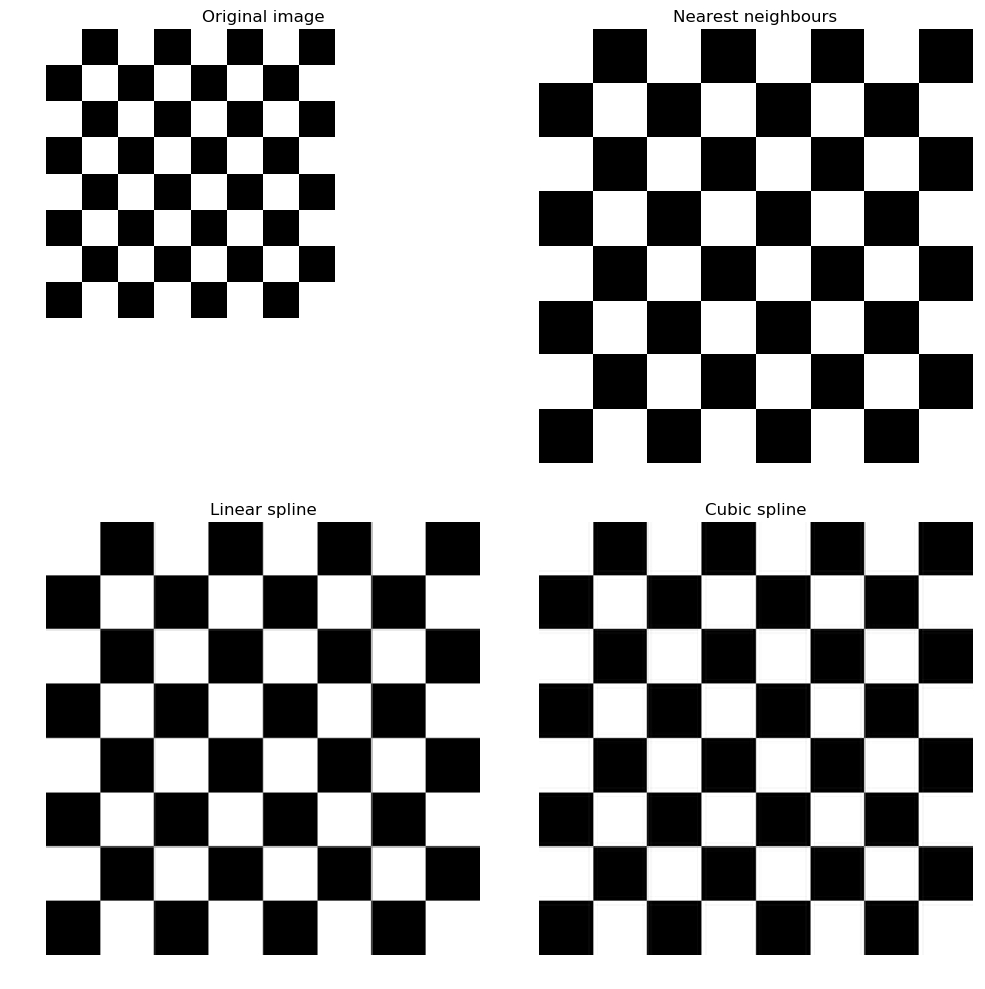

ELAPSED TIMES:
nearest neighbours - 0.012884s
linear spline      - 0.005973s
cubic spline       - 0.487829s


In [16]:
img4 = load("data/chessboard.png")
test_and_plot_results(img4, 300, 300)